## We are using random forest to do the binary classification task.

In [1]:
from pre import complete_data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 200)
forest = forest.fit( complete_data.loc["train"].drop(complete_data.loc["train"].select_dtypes(include="object").dtypes.index, axis=1), complete_data.loc["train"]["class"] )

In [3]:
p = forest.predict(complete_data.loc["test"].drop(complete_data.loc["test"].select_dtypes(include="object").dtypes.index, axis=1))

In [4]:
p_proba = forest.predict_proba(complete_data.loc["test"].drop(complete_data.loc["test"].select_dtypes(include="object").dtypes.index, axis=1))

# The accuracy is: 

In [5]:
# The accuracy of random forest model
# The "class" in train and test is a little bit different. "train":"<=50K" while "test":"<=50K."
from sklearn.metrics import accuracy_score
print(accuracy_score(p+".",complete_data.loc["test"]["class"]))

0.8525274860266568


# Confusion matrix:

In [6]:
# Count the freq of each class in test dataset
from collections import Counter
cnt = Counter(complete_data.loc["test"]["class"])
print(cnt)

# Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(complete_data.loc["test"]["class"],p+"."))

Counter({' <=50K.': 12435, ' >50K.': 3846})
[[11533   902]
 [ 1499  2347]]


|Confusion matrix| Predicted True| Predicted False|
|---------|-------|------|
|Condition True|11440 |995|
|Condition False|1502 | 2344|

(True:<=50K,False:>50K)

# AUC ROC

In [7]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(complete_data.loc["test"]["class"]==" <=50K.",p_proba[:,0],average="weighted")) # "weighted" accounts for class imbalance by computing the average of binary metrics in which each class’s score is weighted by its presence in the true data sample.

0.9023127020778459


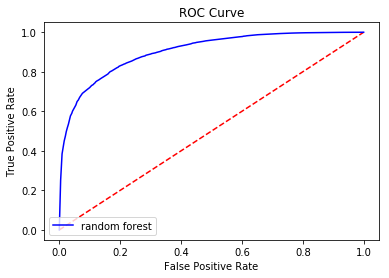

In [8]:
f,ax = plt.subplots()
ax.set_xlim([-0.05,1.05])
ax.set_ylim([-0.05,1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.plot([0,1],[0,1],'r--')

from sklearn.metrics import roc_curve
tpr,fpr,_ = roc_curve(complete_data.loc["test"]["class"],p_proba[:,0],pos_label = " <=50K.")
ax.plot(tpr,fpr,c='b',label="random forest")
ax.legend(loc="lower left")
plt.show()

# PR curve

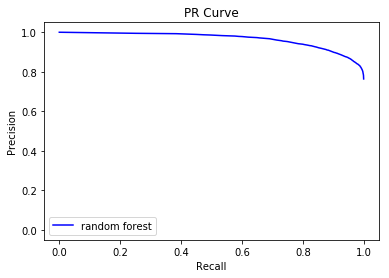

In [9]:
f,ax = plt.subplots()
ax.set_xlim([-0.05,1.05])
ax.set_ylim([-0.05,1.05])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('PR Curve')

from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
p,r,_ = precision_recall_curve(complete_data.loc["test"]["class"],p_proba[:,0],pos_label = " <=50K.")
ax.plot(r,p,c='b',label="random forest")
ax.legend(loc="lower left")
plt.show()